<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Embeddings" data-toc-modified-id="Embeddings-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Embeddings</a></span><ul class="toc-item"><li><span><a href="#PCA-illustration-of-getting-embeddings" data-toc-modified-id="PCA-illustration-of-getting-embeddings-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>PCA illustration of getting embeddings</a></span></li><li><span><a href="#Supervised-example" data-toc-modified-id="Supervised-example-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Supervised example</a></span></li><li><span><a href="#Word-embeddings" data-toc-modified-id="Word-embeddings-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Word embeddings</a></span></li></ul></li><li><span><a href="#Target-based-embedding" data-toc-modified-id="Target-based-embedding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Target based embedding</a></span><ul class="toc-item"><li><span><a href="#Explainability-NO-consideration:-One-Hot-Encoding" data-toc-modified-id="Explainability-NO-consideration:-One-Hot-Encoding-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Explainability <em>NO</em> consideration: One Hot Encoding</a></span></li><li><span><a href="#Connection-with-original-words-IS-important:-Tokenizer" data-toc-modified-id="Connection-with-original-words-IS-important:-Tokenizer-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Connection with original words <em>IS</em> important: Tokenizer</a></span></li><li><span><a href="#difference-in-encoding" data-toc-modified-id="difference-in-encoding-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>difference in encoding</a></span></li></ul></li></ul></div>

## Embeddings

*In this context* an embedding is a numerical representation of non-numerical data. The purpose is primarily for 'mathematical convenience' i.e. it enables computations to be made. For example: One Hot encoder encodes a categorical variable with 6 possible values for its value '3' to 0 0 1 0 0 0. In real life this may mean hair color 'blond'. For the complete picture:

Color  |  encoding
:--- |:--- |
Black | 1 0 0 0 0
Fair | 0 1 0 0 0
Blonde | 0 0 1 0 0
Red | 0 0 0 1 0
Gray | 0 0 0 0 1
None | 0 0 0 0 0

In traditional ML one hot encoding worked fine for most cases. However with the appearance of 'Big Data' some problems arose:  
    - The number of categories can be huge. E.g. consider the number of titles in the IMDB move database
    - The number of observations can be enormous
In this 'Big Data' environment One-hot encoding often results in extremely sparse matrices which any, machine or deep, learning algorithm  has problems dealing with.

Traditionally PCA would be applied to reduce the number of dimensions. But the disadvantage is that a inverse of the matrix is needed. For enormous data sets this is actually a memory/computational problem: Enter Embeddings/embedding layers.

Embedding is in that sense a dimensionality reduction technique to make large categorical data points computationally manageable. There are 2 types of reduction:

1. 'Unsupervised' in the sense that it takes the features at face-value 
PCA could serve as an example from the ML world. PCA tries to minimize the variation 
2. 'Supervised' in the sense it learns from a 'target', some also called a 'learned' embedding
LDA (Linear Discriminant Analysis) is an example. It tries to maximize the separation of known target categories 

Since Bayes we know that the use of prior information will lead to better predictions. Therefore a 'supervised' embedding is preferred if possible, i.e. when the target is known. In practice a learned embedding if often more meaningful than the 'raw' feature itself.

When to use embeddings rather than One_hot?

It depends on the number of categories:

General rules of thumb:

- Under 10 : one hot  
- 10-50: use formula embedding_size = min(50, (NumberOfCats+1)/2) 
- over 50: 50 max.  



### PCA illustration of getting embeddings

Purely to illustrate what goes on under the hood.

In [1]:
from random import choice
import pandas as pd

#create categories
haircolor = ['black', 'blond', 'fair', 'red', 'grey', 'none', 'marron']

df = pd.DataFrame()

#create data
se = []
for i in range(100):
    se.append(choice(haircolor))
df['haircolor'] = se 

#get the One hot
df_ = pd.get_dummies(df[['haircolor']])

In [2]:
df.sample(10, random_state=1999)

,haircolor
41,blond
93,grey
30,marron
80,blond
26,blond
12,black
96,none
89,none
63,marron
9,marron


In [3]:
df_.sample(10, random_state=1999)

,haircolor_black,haircolor_blond,haircolor_fair,haircolor_grey,haircolor_marron,haircolor_none,haircolor_red
41,0,1,0,0,0,0,0
93,0,0,0,1,0,0,0
30,0,0,0,0,1,0,0
80,0,1,0,0,0,0,0
26,0,1,0,0,0,0,0
12,1,0,0,0,0,0,0
96,0,0,0,0,0,1,0
89,0,0,0,0,0,1,0
63,0,0,0,0,1,0,0
9,0,0,0,0,1,0,0


In [4]:
from sklearn.decomposition import PCA

#pca 
pca = PCA(n_components=3)

pca.fit(df_)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Instead of 7 columns/vectors the feature space as been reduced to 3

In [5]:
df__ = pd.DataFrame(pca.transform(df_))
df__['haircolor'] = df['haircolor']
df__.sample(10,random_state=1999)

,0,1,2,haircolor
41,-1.504909e-16,0.195979,-0.512932,blond
93,-1.280506e-15,0.195979,-0.512932,grey
30,-7.071068e-01,-0.504753,0.194514,marron
80,-1.504909e-16,0.195979,-0.512932,blond
26,-1.504909e-16,0.195979,-0.512932,blond
12,-1.479999e-17,0.640731,0.626677,black
96,-1.812356e-16,0.033450,-0.037360,none
89,-1.812356e-16,0.033450,-0.037360,none
63,-7.071068e-01,-0.504753,0.194514,marron
9,-7.071068e-01,-0.504753,0.194514,marron


In [6]:
df__.drop_duplicates()

,0,1,2,haircolor
0,-1.479999e-17,0.640731,0.626677,black
1,-1.812356e-16,0.033450,-0.037360,none
3,-1.504909e-16,0.195979,-0.512932,blond
4,-7.071068e-01,-0.504753,0.194514,marron
5,-1.280506e-15,0.195979,-0.512932,grey
8,7.071068e-01,-0.504753,0.194514,fair
10,1.330805e-15,0.063580,-0.079457,red


### Supervised example

**Just illustrating the mechanics** 

Suppose this s part of marketing survey to see how likely people are to buy suntan lotion.

If possible supervised embedding is preferred over unsupervised, but only if it makes sense. I.e. there is a causal relationship between the 2 variables. In this case: hair color(o.k. *natural* hair color) has a causal relationship to the susceptability of sunburn and therefore the likelihood to need and therefore buy suntan lotion.

In [7]:
# create categorical target with 5 values
df_['buy_suntan?'] = 'likely'

df_.loc[(df_['haircolor_black'] == 1) | (df_['haircolor_marron'] == 1), 'buy_suntan?'] = 'unlikely'
df_.loc[(df_['haircolor_grey'] == 1), 'buy_suntan?'] = 'possible'
df_.loc[(df_['haircolor_none'] == 1), 'buy_suntan?'] = 'undetermined'
df_.loc[(df_['haircolor_red'] == 1), 'buy_suntan?'] = 'very likely'

In [8]:
df_.sample(10, random_state=1999)

,haircolor_black,haircolor_blond,haircolor_fair,haircolor_grey,haircolor_marron,haircolor_none,haircolor_red,buy_suntan?
41,0,1,0,0,0,0,0,likely
93,0,0,0,1,0,0,0,possible
30,0,0,0,0,1,0,0,unlikely
80,0,1,0,0,0,0,0,likely
26,0,1,0,0,0,0,0,likely
12,1,0,0,0,0,0,0,unlikely
96,0,0,0,0,0,1,0,undetermined
89,0,0,0,0,0,1,0,undetermined
63,0,0,0,0,1,0,0,unlikely
9,0,0,0,0,1,0,0,unlikely


In [9]:
X = df_[['haircolor_black', 'haircolor_blond', 'haircolor_fair',
       'haircolor_grey', 'haircolor_marron', 'haircolor_none', 'haircolor_red']]
y = df_['buy_suntan?']

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X = ss.fit_transform(X)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=3)
ldX = pd.DataFrame(lda.fit(X,y).transform(X), columns=['Embed_1', 'Embed_2', 'Embed_3' ])
ldX['buy_suntan?'] = df_['buy_suntan?']
ldX['haircolor'] = df['haircolor']
ldX.sample(10)

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


,Embed_1,Embed_2,Embed_3,buy_suntan?,haircolor
79,-1.455589e+15,1.842936e+15,-1.705045e+15,likely,fair
14,-4.042643e+15,-1.171476e+16,1.353165e+15,possible,grey
68,-1.455589e+15,1.842936e+15,-1.705045e+15,likely,fair
12,-1.455589e+15,1.842936e+15,-1.705045e+15,unlikely,black
85,-1.455589e+15,1.842936e+15,-1.705045e+15,likely,blond
54,-1.455589e+15,1.842936e+15,-1.705045e+15,unlikely,black
84,-4.042643e+15,-1.171476e+16,1.353165e+15,possible,grey
70,-1.455589e+15,1.842936e+15,-1.705045e+15,likely,fair
28,-1.455589e+15,1.842936e+15,-1.705045e+15,likely,fair
29,-1.455589e+15,1.842936e+15,-1.705045e+15,likely,blond


In this case there are 5 unique embeddings, not 7. This reflects the grouping (only 5) that was coded. E.g. 'blond' and 'fair' have the same embedding.

In [11]:
ldX.drop_duplicates()

,Embed_1,Embed_2,Embed_3,buy_suntan?,haircolor
0,-1.455589e+15,1.842936e+15,-1.705045e+15,unlikely,black
1,2.512062e+16,-1.395416e+15,1.147582e+15,undetermined,none
3,-1.455589e+15,1.842936e+15,-1.705045e+15,likely,blond
4,-1.455589e+15,1.842936e+15,-1.705045e+15,unlikely,marron
5,-4.042643e+15,-1.171476e+16,1.353165e+15,possible,grey
8,-1.455589e+15,1.842936e+15,-1.705045e+15,likely,fair
10,-3.809332e+15,5.591162e+15,6.779147e+15,very likely,red


### Word embeddings

In a sense words can be regarded as nominal categorical variables. Therefore embeddings logic applies here as well. So, in very simplistic terms, Word Embeddings are the texts converted into numbers and there may be different numerical representations of the same text.

Different types of Word Embeddings:

1. Frequency based Embedding (unsupervised)
    1. Count Vectors
    - TF-IDF
    - Co-Occurrence Matrix

2. Prediction based Embedding (supervised)
    1. Target variable based  
    The embedding is trained on the model's target y
    2. Word2Vec  
    The embedding is trained on neighboring words. I.e. the context of a word is considered. The (validated) underlying assumption is that similar words are used in similar contexts and are thus srrounded by similar words.  
    2 Main techniques:
        1. CBOW  
        Continuous Bag Of Words predicts the next word given surrounding words.
        - Skip-Gram  
        Skip-gram predicts surrounding words given the current word
    

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/08/Word2Vec-Training-Models.png" />
https://hackernoon.com/hn-images/1*TTPHUemZjeOjALy9k3KX2w.png
<img src="https://hackernoon.com/hn-images/1*d47v_FGYKsNT_QRpCNZlfA.png" />
#https://hackernoon.com/hn-images/1*d47v_FGYKsNT_QRpCNZlfA.png

## Target based embedding

### Explainability *NO* consideration: One Hot Encoding

One hot encoding uses the Hash-vectorizer under the hood. As different words can have the same hash the original words cannot be retrieved/reconstructed. This can be inconvenient if an embedding dict needs to be made. I.e. the embedding for word cannot be found.

In the example comments are coded as positive (1) or not (0). So the prediction entails the probability of a class given a word. The Embedding is the weigths matric fo the hidden layer. 

In [1]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/


from numpy import array
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

keras.backend.clear_session()
np.random.seed(1999)
tf.random.set_seed(1999)


# from keras.layers.embeddings import Embedding
# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']
# define class labels; i.e. the target
labels = array([1,1,1,1,1,0,0,0,0,0])
# integer encode the documents
vocab_size = 50

#this transforms the texts in to sequences of indices

encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# define the model
model = Sequential()
model.add(keras.layers.Embedding(vocab_size, 8, input_length=max_length)) # 8 vectors
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

[[28, 25], [38, 26], [36, 45], [37, 26], [35], [47], [23, 45], [1, 38], [23, 26], [23, 46, 25, 6]]
[[28 25  0  0]
 [38 26  0  0]
 [36 45  0  0]
 [37 26  0  0]
 [35  0  0  0]
 [47  0  0  0]
 [23 45  0  0]
 [ 1 38  0  0]
 [23 26  0  0]
 [23 46 25  6]]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 8)              400       
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None
Accuracy: 89.999998


### Connection with original words *IS* important: Tokenizer

In [29]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/


from numpy import array
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

keras.backend.clear_session()
np.random.seed(1999)
tf.random.set_seed(1999)


# from keras.layers.embeddings import Embedding
# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better']
# define class labels; i.e. the target
labels = array([1,1,1,1,1,0,0,0,0,0])
# integer encode the documents


# https://stackoverflow.com/questions/54836522/keras-understanding-word-embedding-layer
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

#this creates the dictionary
#IMPORTANT: MUST HAVE ALL DATA - including Test data
#IMPORTANT2: This method should be called only once for every new data set!!!
tokenizer.fit_on_texts(docs)

#this transforms the texts in to sequences of indices (aka transformer)
encoded_docs2 = tokenizer.texts_to_sequences(docs)

#Retrieve Vocab size from corpus

vocab_size=len(tokenizer.word_index.keys())+1 #allow for '0' for padding
print(f'#unique words == vocab_size {len(tokenizer.word_index.keys())}')
print(encoded_docs2)

# Determine longest sentence to determine padding
from nltk.tokenize import word_tokenize
word_count = lambda sentence: len(word_tokenize(sentence)) #can recognize punctuation
# word_count = lambda sentence: len(sentence.split(' ')) #
longest_sentence = max(docs, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
print(f'length_long_sentence {length_long_sentence}')
max_length = length_long_sentence

# Padding of the docs
padded_docs2 = pad_sequences(encoded_docs2, maxlen=max_length, padding='post')
print(padded_docs2)

# define the model
model2 = Sequential()
model2.add(keras.layers.Embedding(vocab_size, 8, input_length=max_length))
model2.add(Flatten()) #comment out en using GlobalMaxPool1D layer)
# model2.add(keras.layers.GlobalMaxPool1D())
model2.add(Dense(1, activation='sigmoid')) # <== binary, adjust for number of classes
# compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model2.summary())
# fit the model
model2.fit(padded_docs2, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model2.evaluate(padded_docs2, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

#unique words == vocab_size 14
[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
length_long_sentence 4
[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 8)              120       
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None
Accuracy: 89.999998


### difference in encoding

In [30]:
for i in range(len(docs)):
    print(encoded_docs[i], '\t',docs[i])

[28, 25] 	 Well done!
[38, 26] 	 Good work
[36, 45] 	 Great effort
[37, 26] 	 nice work
[35] 	 Excellent!
[47] 	 Weak
[23, 45] 	 Poor effort!
[1, 38] 	 not good
[23, 26] 	 poor work
[23, 46, 25, 6] 	 Could have done better


In [31]:
for i in range(len(docs)):
    print(encoded_docs2[i], '\t',docs[i])

[6, 2] 	 Well done!
[3, 1] 	 Good work
[7, 4] 	 Great effort
[8, 1] 	 nice work
[9] 	 Excellent!
[10] 	 Weak
[5, 4] 	 Poor effort!
[11, 3] 	 not good
[5, 1] 	 poor work
[12, 13, 2, 14] 	 Could have done better


In [32]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))
reverse_word_map

{1: 'work',
 2: 'done',
 3: 'good',
 4: 'effort',
 5: 'poor',
 6: 'well',
 7: 'great',
 8: 'nice',
 9: 'excellent',
 10: 'weak',
 11: 'not',
 12: 'could',
 13: 'have',
 14: 'better'}

In [33]:
model2.layers[0].get_weights()[0].shape

(15, 8)

In [34]:
embeddings = model2.layers[0].get_weights()[0]

In [35]:
pd.concat([pd.DataFrame.from_dict(reverse_word_map,orient='index')
           ,pd.DataFrame(embeddings)], axis=1)

,0,0,1,2,3,4,5,6,7
0,NaN,0.005104,-0.091474,0.056546,0.033382,-0.031592,0.009875,0.093768,0.099018
1,work,0.012157,-0.048473,-0.060757,-0.069719,-0.096626,0.075920,-0.097345,0.093008
2,done,0.031231,-0.018269,-0.081133,-0.012675,-0.011171,0.075244,-0.034972,-0.078955
3,good,0.001083,0.000182,0.094942,0.057902,0.042518,-0.084367,0.064010,-0.082583
4,effort,-0.024135,0.087178,0.004909,0.062697,0.093684,-0.057316,0.069480,0.004347
5,poor,-0.037190,-0.078268,-0.085165,-0.006504,0.040269,0.051170,-0.015642,0.098759
6,well,0.079426,0.082255,0.064336,0.017975,-0.095145,-0.056427,0.008076,-0.054495
7,great,0.079785,0.024851,0.029915,0.059481,-0.013340,-0.101985,0.089219,-0.040026
8,nice,0.094104,0.071999,0.029981,0.022791,-0.098274,-0.048114,0.048524,-0.070325
9,excellent,0.062333,0.044538,0.038080,0.029196,-0.093700,-0.052801,0.022940,-0.038999


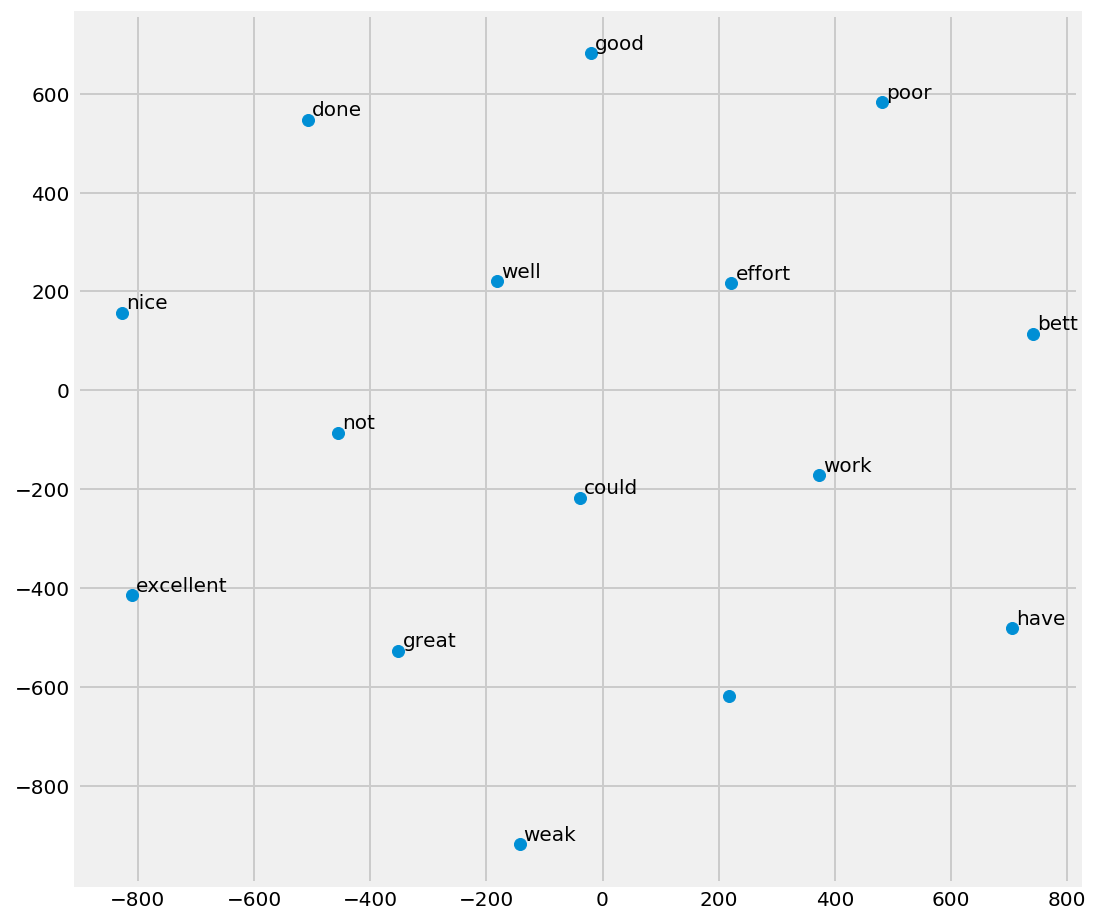

In [12]:

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

words =  list(tokenizer.word_index.keys())
vectors = embeddings

Y = tsne.fit_transform(vectors)

fig,ax= plt.subplots(figsize=(8,8))
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
#     print(label,x,y)
    plt.annotate(label, xy=(x, y), clip_on=True, xytext=(2,2), textcoords="offset points")
plt.show()

In [13]:
# https://stackoverflow.com/questions/54836522/keras-understanding-word-embedding-layer
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

#this creates the dictionary
#IMPORTANT: MUST HAVE ALL DATA - including Test data
#IMPORTANT2: This method should be called only once!!!
tokenizer.fit_on_texts(docs)

#this transforms the texts in to sequences of indices
encoded_docs2 = tokenizer.texts_to_sequences(docs)

ModuleNotFoundError: No module named 'keras'

In [16]:
glove_file = open('/Users/maartenk/Documents/git/CookBooks/Sources/glove.6B.50d.txt', encoding="utf8")

In [17]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions

glove_file.close()

In [18]:
list(embeddings_dictionary.items())[:4]

[('the',
  array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
         -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
          2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
          1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
         -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
         -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
          4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
          7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
         -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
          1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
        dtype=float32)),
 (',', array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
         -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
         -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078

In [39]:
embedding_matrix = zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Embedding

deep_inputs = Input(shape=(length_long_sentence,))
embedding = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=length_long_sentence, trainable=False)(deep_inputs) # line A
flatten = Flatten()(embedding)
hidden = Dense(1, activation='sigmoid')(flatten)
model3 = Model(inputs=deep_inputs, outputs=hidden)

In [46]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model3.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 4, 50)             750       
_________________________________________________________________
flatten_2 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 951
Trainable params: 201
Non-trainable params: 750
_________________________________________________________________
None


In [47]:
model3.fit(padded_docs2, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model2.evaluate(padded_docs2, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 89.999998


In [51]:
embeddings = model3.layers[1].get_weights()[0]

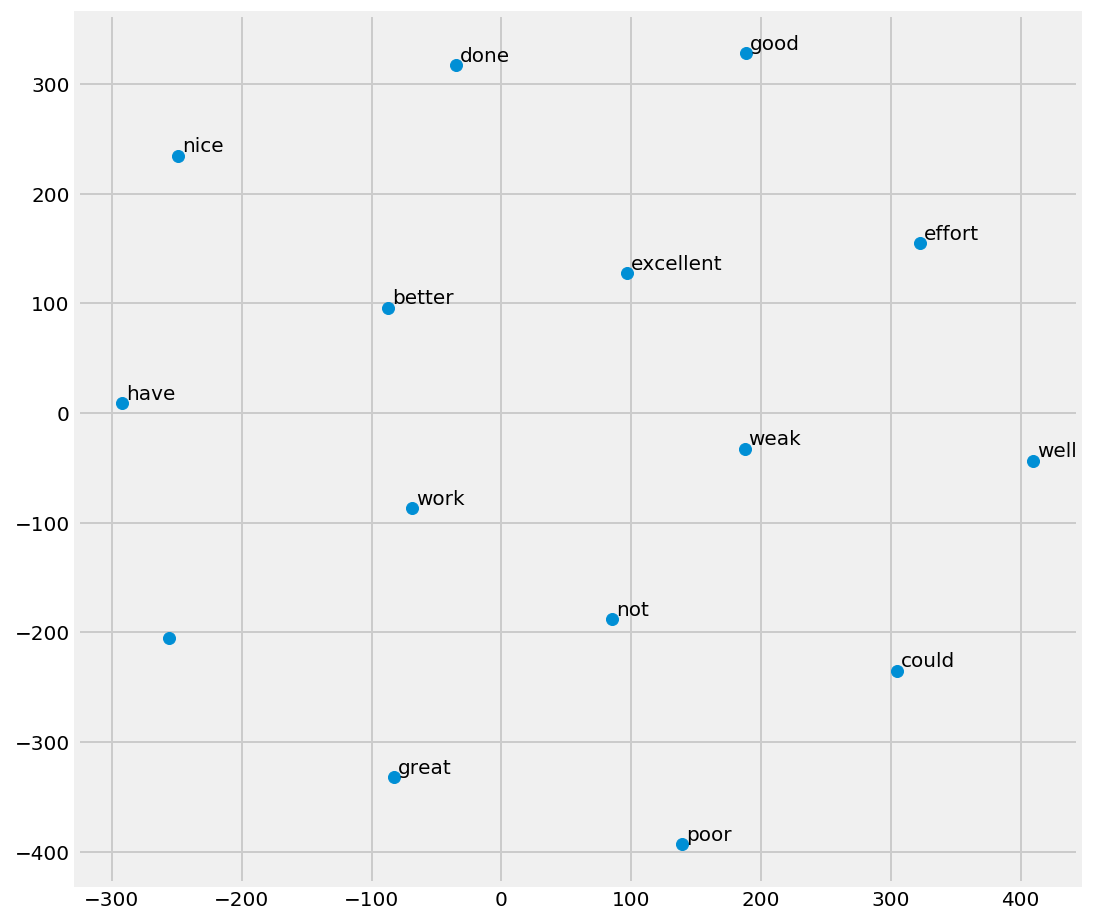

In [52]:

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

words =  list(tokenizer.word_index.keys())
vectors = embeddings

Y = tsne.fit_transform(vectors)

fig,ax= plt.subplots(figsize=(8,8))
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
#     print(label,x,y)
    plt.annotate(label, xy=(x, y), clip_on=True, xytext=(2,2), textcoords="offset points")
plt.show()

### DIY

In [53]:
from gensim.models import Word2Vec

In [58]:
#training word2vec on 3 sentences
model = Word2Vec(docs, min_count=0,size=50,workers=4)

In [66]:
fomodel.vocabulary:
    print(i)

TypeError: 'Word2VecVocab' object is not iterable

In [77]:
#https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [78]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [80]:
y

[class_0, class_0, class_0, class_0, class_0, ..., class_2, class_2, class_2, class_2, class_2]
Length: 178
Categories (3, object): [class_0, class_1, class_2]

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit_transform(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 3 - 1) = 2 components.
  ChangedBehaviorWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not [class_0, class_0, class_0, class_0, class_0, ..., class_2, class_2, class_2, class_2, class_2]
Length: 178
Categories (3, object): [class_0, class_1, class_2].

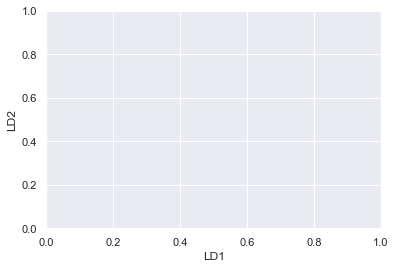

In [82]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [84]:
# Load libraries
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the Iris flower dataset:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create an LDA that will reduce the data down to 1 feature
lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, y).transform(X)

# Print the number of features
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

## View the ratio of explained variance
lda.explained_variance_ratio_

Original number of features: 4
Reduced number of features: 1


array([0.9912])

In [88]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

# Load the data
digits = datasets.load_digits()

# Standardize the feature matrix
X = StandardScaler().fit_transform(digits.data)
y =  digits.target
# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X)

# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 64
Reduced number of features: 54


In [93]:
lda = LinearDiscriminantAnalysis(n_components=54)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, y).transform(X)

# Print the number of features
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

## View the ratio of explained variance
print(lda.explained_variance_ratio_)

Original number of features: 64
Reduced number of features: 9
[0.2891 0.1826 0.1696 0.1167 0.083  0.0657 0.0431 0.0293 0.0208]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(64, 10 - 1) = 9 components.
  ChangedBehaviorWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [95]:
sum(lda.explained_variance_ratio_)

0.9999999999999999

In [17]:
df_.drop('buy_suntan?', axis=1).shape

(100, 7)

In [21]:
np.asarray(df_.drop('buy_suntan?', axis=1))

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1,

In [25]:
import tensorflow as tf
from tensorflow import keras

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)


In [53]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Embedding(100, 1, input_length=7))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(3))#, activation='sigmoid'))
# the model will take as input an integer matrix of size (batch, input_length).
# the largest integer (i.e. word index) in the input should be
# no larger than 999 (vocabulary size).
# now model.output_shape == (None, 10, 64), where None is the batch dimension.

input_array = np.asarray(df_.drop('buy_suntan?', axis=1))#np.random.randint(1000, size=(32, 10))

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
# assert output_array.shape == (32, 10, 64)
output_array.shape

(100, 3)

In [67]:
model = keras.models.Sequential([
    keras.layers.Dense(3, input_shape=input_array.shape[1:])#,
#     keras.layers.Dense(3)
    ])

In [68]:
model.compile('rmsprop', 'mse')
output_array_ = model.predict(input_array)
# assert output_array.shape == (32, 10, 64)
output_array_.shape

(100, 3)

In [69]:
dfx = pd.DataFrame(output_array_)#.drop_duplicates()
dfx['hair_color'] = df['haircolor']
dfx.drop_duplicates()

,0,1,2,hair_color
0,0.710024,-0.748557,-0.285666,black
1,-0.436497,0.294690,0.325131,none
2,0.586755,-0.025443,0.317029,red
8,0.191005,0.753687,-0.585121,grey
9,-0.454533,0.574956,-0.742604,marron
11,-0.596687,-0.258554,-0.447850,fair
12,-0.526522,0.332875,0.448169,blond


,0,1,2,haircolor
0,-0.218256,-0.518452,0.705315,marron
1,-0.081798,-0.068073,-0.078232,fair
2,0.868897,0.130854,0.082864,blond
3,-0.154020,-0.195346,-0.468987,grey
4,-0.154020,-0.195346,-0.468987,black
5,-0.096952,-0.086958,-0.108315,red
11,-0.374408,0.792713,0.201294,none


In [66]:
input_array.shape[1:]

(7,)

In [85]:

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.backend.one_hot((100,1), 7)])#,
#     keras.layers.Dense(3)])#,#


input_array = np.asarray(df)#np.random.randint(1000, size=(32, 10))

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
output_array

TypeError: The added layer must be an instance of class Layer. Found: tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]], shape=(2, 7), dtype=float32)

In [86]:
df.shape

(100, 1)

In [87]:
input_array = np.random.randint(1000, size=(32, 10))

In [88]:
input_array.shape

(32, 10)

In [91]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(1000, 64, input_length=10))
# the model will take as input an integer matrix of size (batch, input_length).
# the largest integer (i.e. word index) in the input should be
# no larger than 999 (vocabulary size).
# now model.output_shape == (None, 10, 64), where None is the batch dimension.

input_array = np.random.randint(1000, size=(32, 10))

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
assert output_array.shape == (32, 10, 64)

In [94]:
input_array


array([[143, 608, 200, 123, 186, 325, 463, 348, 770, 659],
       [763, 954, 931, 402, 345, 962, 510, 146, 147, 863],
       [710, 819, 488, 928, 935, 639, 550, 337, 871, 640],
       [778, 987, 952, 472, 945, 150, 414, 989, 297, 610],
       [262, 763, 143, 345, 623, 571, 880,   1, 896, 303],
       [253, 651, 452,  36, 159,   8, 232,  98, 658, 815],
       [207, 130, 403, 151,  53, 119, 672, 919, 627, 586],
       [624, 967, 419, 421, 103, 851, 253, 226, 111, 509],
       [472,  98, 152, 860, 913, 895, 877, 337, 705, 821],
       [162, 719, 956, 680, 995, 160, 579, 800, 397, 276],
       [815, 915, 503, 895, 391, 134, 194, 400, 639,  32],
       [687, 459, 954, 882, 469, 374,  21, 749, 669,  37],
       [229, 364, 562, 437, 775, 282,  26, 225, 276, 797],
       [608, 283, 878, 959, 480, 452, 828, 815, 658, 515],
       [546, 191,  48, 511,  16, 171, 219, 157, 476,  45],
       [372, 517,  98, 891, 744,  36, 279, 348, 496, 301],
       [180, 606,  98, 699, 992, 115, 190, 252, 980, 927